<a href="https://colab.research.google.com/github/Muzzarino2811/20_MuzzarinoAkbar/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Histogram citra gambar lena

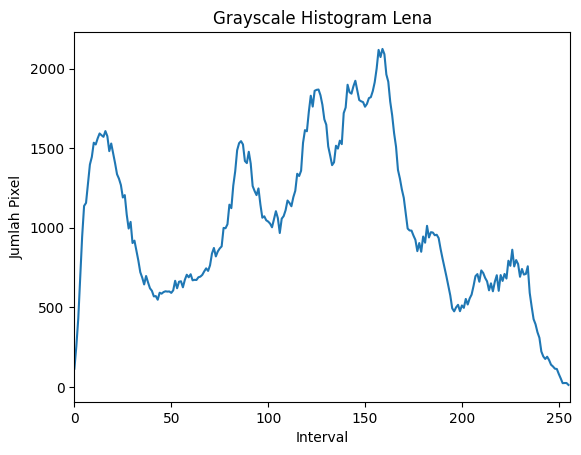

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram Lena")
plt.xlabel("Interval")
plt.ylabel("Jumlah Pixel")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()


2. Menggunakan library numPy histogram

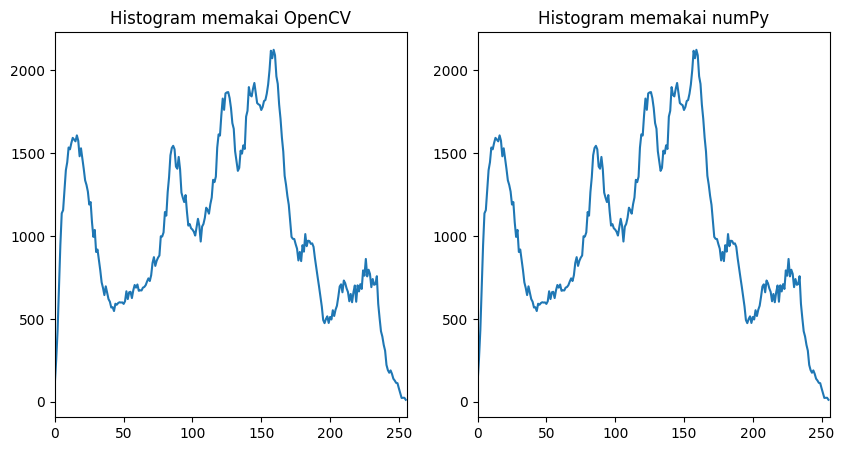

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
opencv_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
numpy_hist, bins = np.histogram(gray_image.ravel(), bins=256, range=[0,256])

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Histogram memakai OpenCV")
plt.plot(opencv_hist)
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.title("Histogram memakai numPy")
plt.plot(numpy_hist)
plt.xlim([0, 256])

plt.show()


Hasil sama karena memang prinsip nya sama, mungkin hanya berbeda sedikit di cara penghitungan


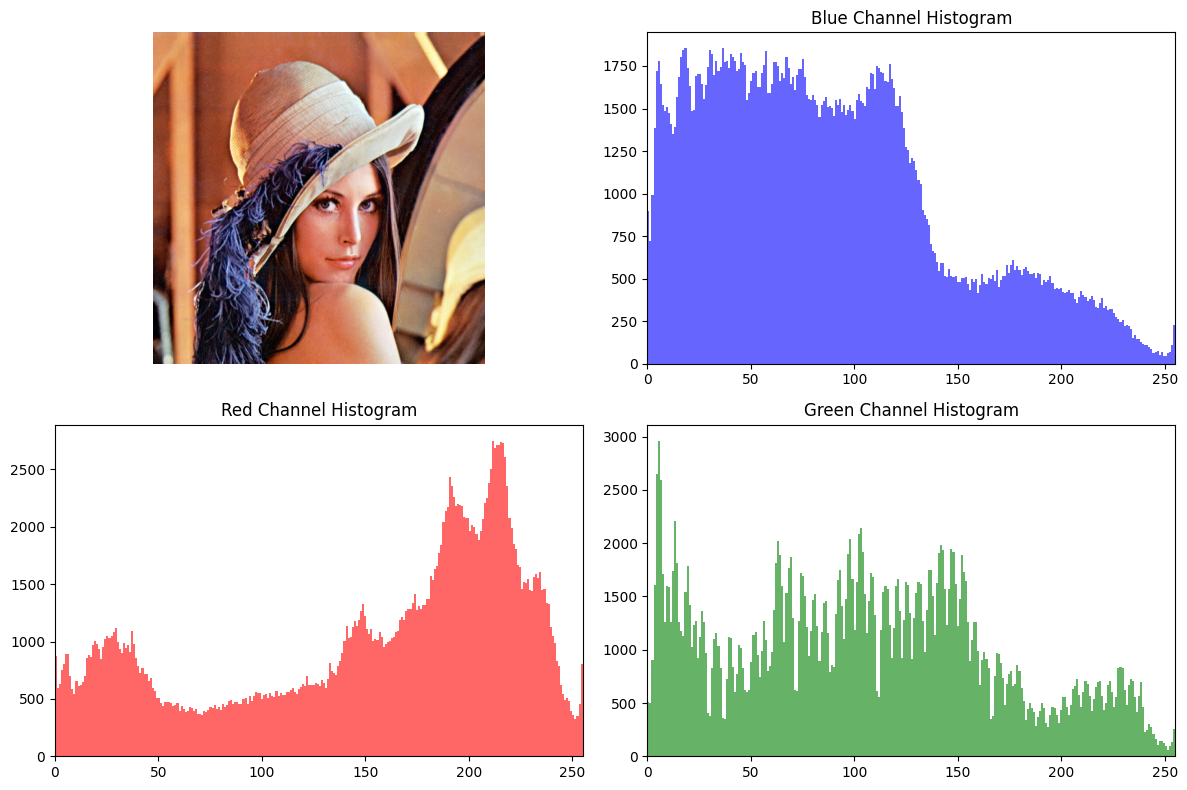

In [39]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'  # Change to your image path
original_image = Image.open(image_path)

# Convert image to RGB if it's not already
image = original_image.convert('RGB')

# Convert the image to a NumPy array
image_array = np.array(image)

# Split the image into R, G, B channels
r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]

# Create histograms for each channel
r_hist = r.flatten()
g_hist = g.flatten()
b_hist = b.flatten()

# Plot the image and histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Increased figure size for better layout

# Show the image in the top-left corner
axs[0, 0].imshow(image)
axs[0, 0].axis('off')  # Hide axes for the image

# Red channel histogram
axs[1, 0].hist(r_hist, bins=256, color='red', alpha=0.6)
axs[1, 0].set_xlim(0, 255)  # Set x-axis limits for better visibility
axs[1, 0].set_title('Red Channel Histogram')

# Green channel histogram
axs[1, 1].hist(g_hist, bins=256, color='green', alpha=0.6)
axs[1, 1].set_xlim(0, 255)  # Set x-axis limits for better visibility
axs[1, 1].set_title('Green Channel Histogram')

# Blue channel histogram
axs[0, 1].hist(b_hist, bins=256, color='blue', alpha=0.6)
axs[0, 1].set_xlim(0, 255)  # Set x-axis limits for better visibility
axs[0, 1].set_title('Blue Channel Histogram')

plt.tight_layout()
plt.show()


3. Membuat yang sama menggunakan equalizeHist

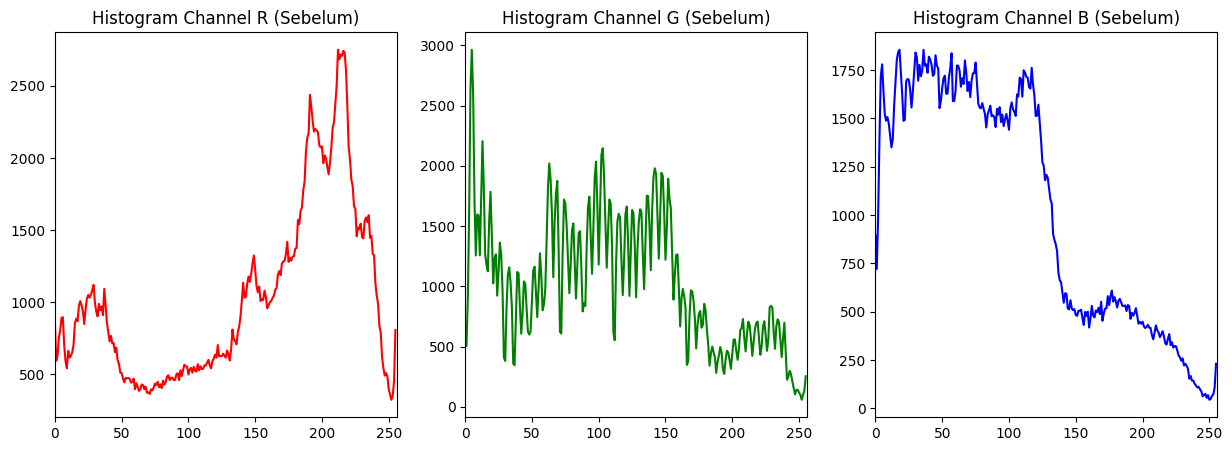

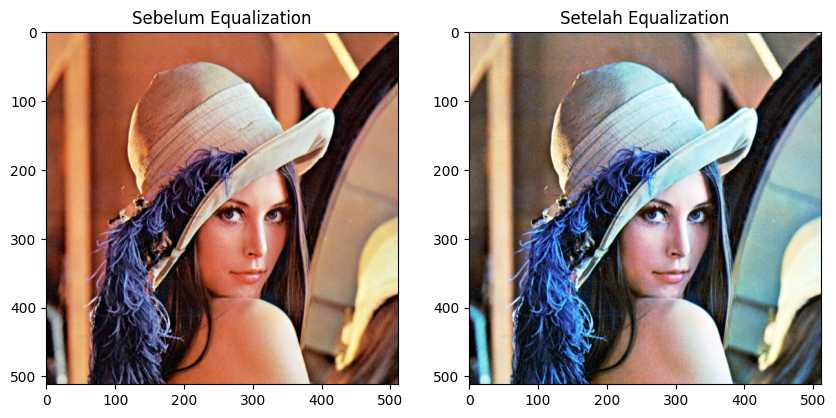

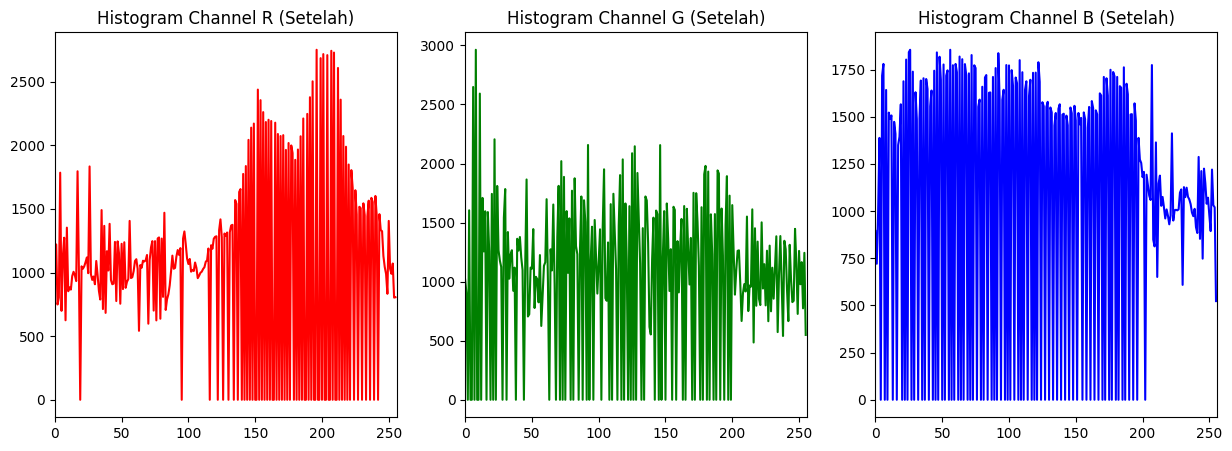

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(image_rgb)

def plot_histogram(image, color, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(title)

# Plot histogram sebelum histogram equalization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_histogram(r, 'red', 'Histogram Channel R (Sebelum)')
plt.subplot(1, 3, 2)
plot_histogram(g, 'green', 'Histogram Channel G (Sebelum)')
plt.subplot(1, 3, 3)
plot_histogram(b, 'blue', 'Histogram Channel B (Sebelum)')
plt.show()

# Lakukan equalization dengan equalizeHist
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Gabung citra setelah equalization
image_eq = cv2.merge((r_eq, g_eq, b_eq))

# Tampilkan gambar sebelum dan sesudah
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Sebelum Equalization')

plt.subplot(1, 2, 2)
plt.imshow(image_eq)
plt.title('Setelah Equalization')
plt.show()

# Plot histogram setelah equalization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_histogram(r_eq, 'red', 'Histogram Channel R (Setelah)')
plt.subplot(1, 3, 2)
plot_histogram(g_eq, 'green', 'Histogram Channel G (Setelah)')
plt.subplot(1, 3, 3)
plot_histogram(b_eq, 'blue', 'Histogram Channel B (Setelah)')
plt.show()


4. Pemetaan 16 juta warna menjadi 8 warna sahaja

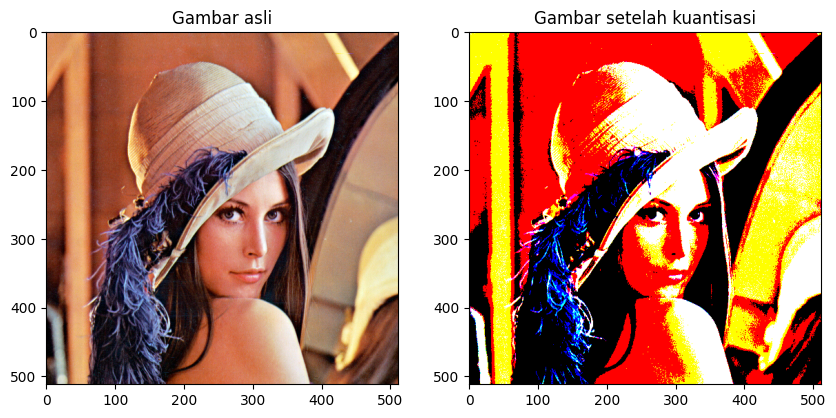

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# mendefinisi 8 warna utama
colors = {
    'black': [0, 0, 0],
    'white': [255, 255, 255],
    'red': [255, 0, 0],
    'green': [0, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'yellow': [255, 255, 0]
}

# fungsi untuk memetakan setiap piksel ke salah satu dari 8 warna
def quantize_color(pixel):
    r, g, b = pixel
    if r < 128 and g < 128 and b < 128:
        return colors['black']
    elif r >= 128 and g >= 128 and b >= 128:
        return colors['white']
    elif r >= 128 and g < 128 and b < 128:
        return colors['red']
    elif r < 128 and g >= 128 and b < 128:
        return colors['green']
    elif r < 128 and g < 128 and b >= 128:
        return colors['blue']
    elif r < 128 and g >= 128 and b >= 128:
        return colors['cyan']
    elif r >= 128 and g < 128 and b >= 128:
        return colors['magenta']
    elif r >= 128 and g >= 128 and b < 128:
        return colors['yellow']

#kuantisasi pada setiap piksel di gambarblena
quantized_image = np.apply_along_axis(quantize_color, 2, image_rgb)

# Konversi hasil ke bentuk uint8
quantized_image = np.array(quantized_image, dtype=np.uint8)

# Tampilkan gambar asli dan setelah kuantisasi warna
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar asli')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('Gambar setelah kuantisasi')
plt.show()


5. Proses dithering floyd and steinberg

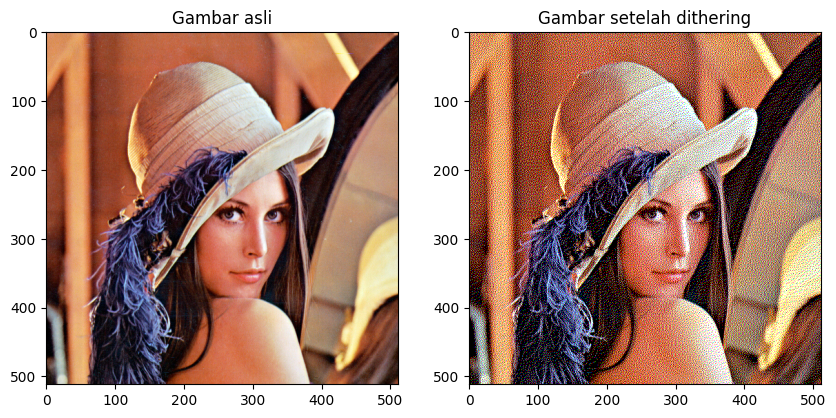

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

rows, cols, channels = image.shape
dithered_image = image.copy().astype(float)

# Floyd-Steinberg dithering untuk setiap Channel
for y in range(rows):
    for x in range(cols):
        for c in range(channels):
            old_pixel = dithered_image[y, x, c]
            new_pixel = 255 if old_pixel > 128 else 0
            dithered_image[y, x, c] = new_pixel
            quantization_error = old_pixel - new_pixel
            if x + 1 < cols:
                dithered_image[y, x + 1, c] += quantization_error * 7 / 16
            if x - 1 >= 0 and y + 1 < rows:
                dithered_image[y + 1, x - 1, c] += quantization_error * 3 / 16
            if y + 1 < rows:
                dithered_image[y + 1, x, c] += quantization_error * 5 / 16
            if x + 1 < cols and y + 1 < rows:
                dithered_image[y + 1, x + 1, c] += quantization_error * 1 / 16

# memastikan semua piksel dalam rentang
dithered_image = np.clip(dithered_image, 0, 255).astype(np.uint8)

# menampilkan gambar asli dan gambar setelah dithering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar asli')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dithered_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar setelah dithering')

plt.show()


6. Ubah menjadi grey, lalu histogram equalization, setelah itu floyd-steinberg dithering

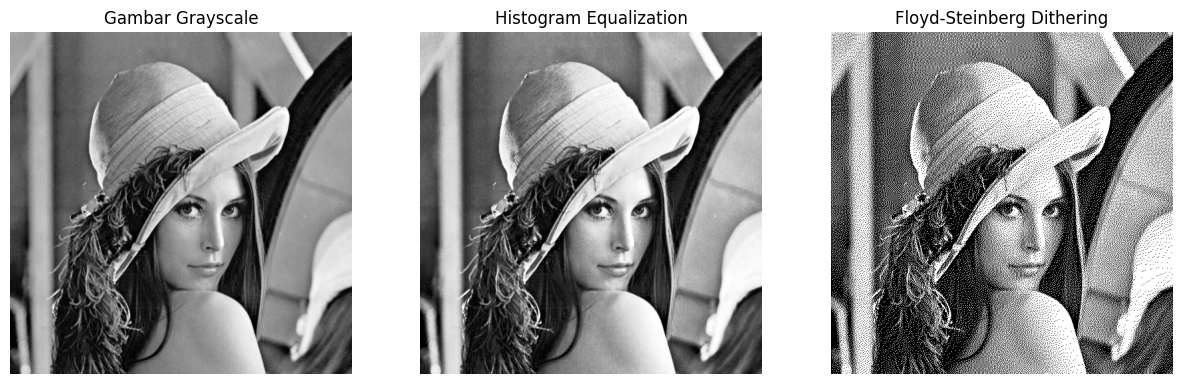

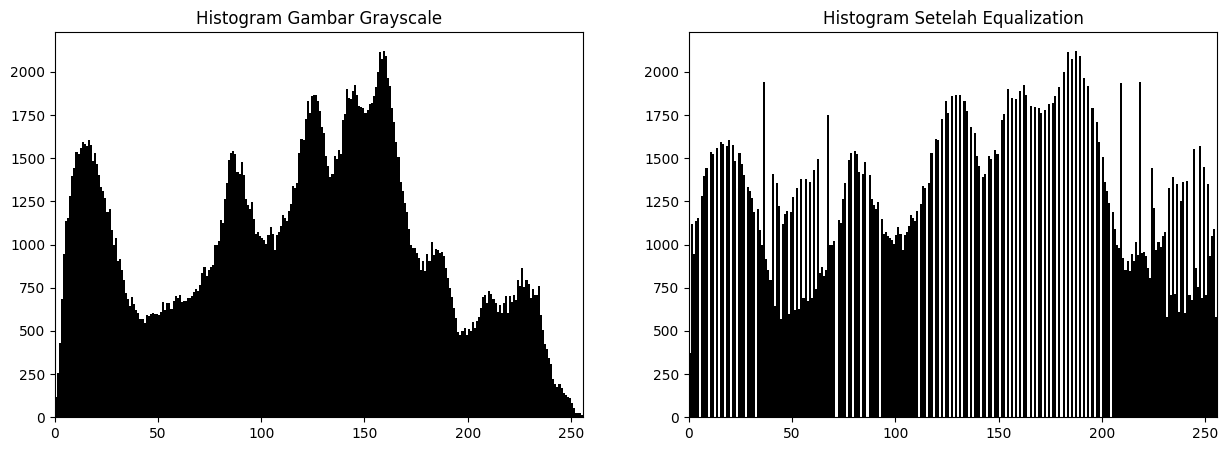

In [40]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import math
import os
import glob

image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)

def floyd_steinberg_dithering(img):
    h, w = img.shape
    new_img = np.copy(img).astype(float)

    for y in range(h):
        for x in range(w):
            old_pixel = new_img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            new_img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < w:
                new_img[y, x + 1] += error * 7 / 16
            if y + 1 < h:
                if x - 1 >= 0:
                    new_img[y + 1, x - 1] += error * 3 / 16
                new_img[y + 1, x] += error * 5 / 16
                if x + 1 < w:
                    new_img[y + 1, x + 1] += error * 1 / 16
    return new_img.astype(np.uint8)

dithered_img = floyd_steinberg_dithering(equalized_img)



plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(dithered_img, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(gray_img.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram Gambar Grayscale')
plt.xlim([0, 256])


plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram Setelah Equalization')
plt.xlim([0, 256])

plt.show()
